tgb - 1/8/2020 - Figures 1 and 2 from reduced data

tgb - 5/27/2020 - Add time-averaged PDF and waterfall plot of CWV, and correct color inconsistencies for revisions

tgb - 6/5/2020 - Adapting [https://github.com/tbeucler/2019_WMI/blob/master/dev/tbeucler/016_Figures12_from_reduced_data.ipynb] for final figure script

# 0) Imports and Utilities

In [1]:
!rm util # Run if util folder already exists, will produce an error otherwise

rm: cannot remove ‘util’: No such file or directory


In [2]:
!ln -s ../../util util # Symlink to utilities folder

In [3]:
# Initial imports
import util.Landau_Potential_Diffusion as Landau
import util.curvature as curve
import util.pdf as PDF

import xarray as xr
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec
import matplotlib as mpl
import matplotlib.transforms as mtransforms
import datetime
from skimage import measure
from scipy import ndimage, stats
import scipy.integrate as sin
from scipy.optimize import curve_fit
from scipy.ndimage.filters import gaussian_filter1d
import random
import pandas as pd

import pickle

/home/tbeucler/miniconda3/lib/python3.7/site-packages/xarray/core/merge.py:18: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)
/home/tbeucler/miniconda3/lib/python3.7/site-packages/xarray/core/dataarray.py:1829: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  'DataArray', pd.Series, pd.DataFrame, pd.Panel]:


In [4]:
# Figure characteristics common to all Figures
fz = 15
lw = 3
siz = 10

plt.rc('text', usetex=False)
plt.rc('font', family='serif', size=fz)
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['lines.linewidth'] = lw
mpl.rcParams['lines.markersize'] = siz
plt.close('all')

# Physical constants
stday = 24*3600

In [27]:
pathPKL = '../../dev/tbeucler/PKL_DATA/'

In [6]:
class Bunch(object):
  
    def __init__(self, adict):
        self.__dict__.update(adict)

In [7]:
def edgTObin(edges):
    return 0.5*(edges[1:]+edges[:-1])

In [8]:
def get_all_values(dic_values):
    values = []
    for i_k, key in enumerate(dic_values.keys()):
        values.extend(dic_values[key])
    return values

In [9]:
def find_index(time_A, time_cond):
    ind = np.where(time_A == time_cond)[0][0]
    return ind

# 1) Figure 1

In [28]:
# Load reduced data into dictionary S
path = pathPKL+'2020_01_08_COSMO_CWV.pkl'
hf = open(path,'rb')
S = pickle.load(hf)
F1a = Bunch(S)

In [29]:
# Load reduced data into dictionary S
path = pathPKL+'2019_11_19_Fig1a.pkl'
hf = open(path,'rb')
S = pickle.load(hf)
F1c = Bunch(S)

In [30]:
path = pathPKL+'2020_05_26_Fig1ce.pkl'
hf = open(path,'rb')
S = pickle.load(hf)
F1e = Bunch(S)

In [31]:
# Load reduced data into dictionary S
path = pathPKL+'2020_01_08_ERA5_CWV.pkl'
hf = open(path,'rb')
S = pickle.load(hf)
F1b = Bunch(S)

In [32]:
# Load reduced data into dictionary S
path = pathPKL+'2020_01_08_ERA5_PDF.pkl'
hf = open(path,'rb')
S = pickle.load(hf)
F1d = Bunch(S)

In [36]:
# Load reduced data into dictionary S
path = pathPKL+'2020_05_27_Fig1df.pkl'
hf = open(path,'rb')
S = pickle.load(hf)
F1f = Bunch(S)

In [37]:
path = pathPKL+'2020_01_20_p88.pkl'
hf = open(path,'rb')
S = pickle.load(hf)
P88 = Bunch(S) # Measuring the 88th percentile in COSMO simulations

In [38]:
path = pathPKL+'2020_01_20_ERAp83.pkl'
hf = open(path,'rb')
S = pickle.load(hf)
P83 = Bunch(S) # Measuring the 83rd percentile in ERA5 reanalysis

In [39]:
path = pathPKL+'2020_01_20_MSE_a.pkl'
hf = open(path,'rb')
S = pickle.load(hf)
XY = Bunch(S)

In [40]:
switch_kde = False
method = 'KDE' if switch_kde else 'PDF'

In [41]:
# Contour value is either a fixed value in mm or a fixed percentile
Cval = 68.46531372070311 # In mm, corresponds to the 88th percentile for consistency with Dave's section
Cval_ERA = 48.659915924072266 # In mm, corresponds to the 83rd percentile for consistency with Julia's section

/home/tbeucler/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:147: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


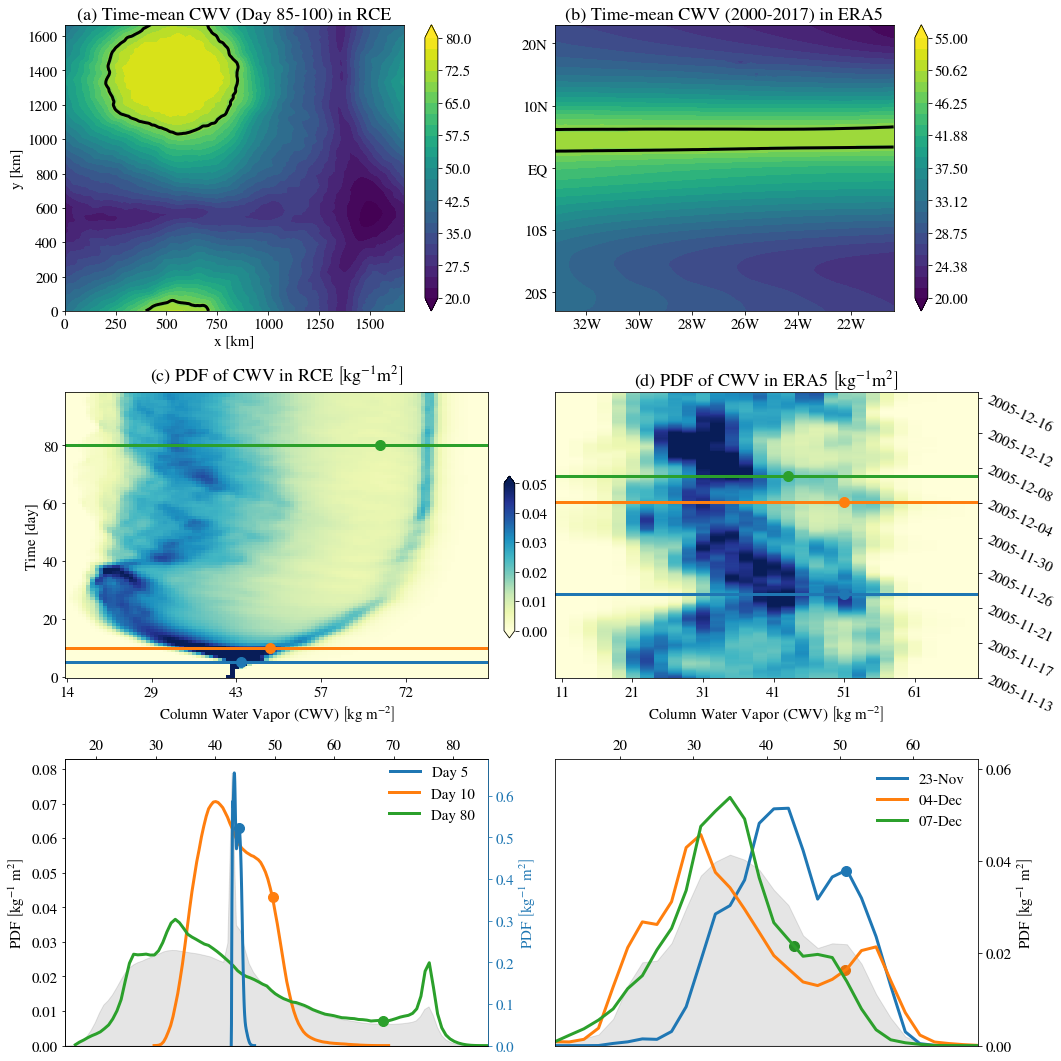

In [42]:
### Figure 1a
fig,ax0 = plt.subplots(3,2,figsize=(15,15))
ax = ax0[0][0]
ax.contour(XY.x,XY.y,F1a.toplot,[Cval],colors='k')
cont_levels = np.linspace(20,80,25)
im = ax.contourf(XY.x, XY.y, F1a.toplot, cont_levels, vmin = 20, vmax = 80, extend='both')
ax.set_xlabel('x [km]')
ax.set_ylabel('y [km]')
ax.set_title('(a) Time-mean CWV (Day 85-100) in RCE')
cbar = fig.colorbar(im,ax=ax)
## Figure 1c
ax = ax0[1][0]
WF_RCE = ax.matshow(F1e.pdf,cmap='YlGnBu',vmin=0,vmax=0.05,aspect='auto')
# Create independent axis for unique colorbar
axcbar = fig.add_axes([0.475,0.4,0.01,0.15])
cbar_RCE = fig.colorbar(WF_RCE,ax=ax,cax=axcbar,extend='both',orientation='vertical')
#cbar_RCE.set_label(r'$\mathrm{PDF\ }\left[\mathrm{kg^{-1}\ m^{2}}\right]$',labelpad=-3)
ax.set_ylabel('Time [day]')
ax.invert_yaxis()
ax.axhline(y=5,color=F1e.BLUErgb)
ax.axhline(y=10,color=F1e.ORANrgb)
ax.axhline(y=80,color=F1e.GREErgb)
ax.scatter(x=np.argmin(np.abs(edgTObin(F1e.GRAYedges)-np.mean(F1e.BLUE_P88))),y=5,color=F1e.BLUErgb)
ax.scatter(x=np.argmin(np.abs(edgTObin(F1e.GRAYedges)-np.mean(F1e.ORAN_P88))),y=10,color=F1e.ORANrgb)
ax.scatter(x=np.argmin(np.abs(edgTObin(F1e.GRAYedges)-np.mean(F1e.GREE_P88))),y=80,color=F1e.GREErgb)
ax.set_xlabel(r'$\mathrm{Column\ Water\ Vapor\ \left(CWV\right)\ }\left[\mathrm{kg\ m^{-2}}\right]$')
ax.set_title(r'$\mathrm{\left(c\right)\ PDF\ of\ CWV\ in\ RCE\ \left[kg^{-1}m^{2}\right]}$',pad=-3)
ax.xaxis.tick_bottom()
ax.xaxis.set_label_position("bottom")
plt.draw()
locs = ax.get_xticks()
labels = list(np.arange(len(locs)))
for i_l, loc in enumerate(locs):
    labels[i_l] = '%i'%int(edgTObin(F1e.GRAYedges)[int(np.minimum(np.size(F1e.GRAYedges)-2,
                                                                  np.maximum(loc,0)))])
ax.set_xticklabels(labels)
### Figure 1e
ax = ax0[2][0]
ax2 = ax.twinx()
# Right axis = Day 11-100
SPINline = ax2.plot(edgTObin(F1e.BLUEedges),F1e.CWV_PDF_BLUE,color=F1e.BLUErgb,label='Day 5')
# Add dots to indicate mean value of percentile chosen for BLW
iBLUE = np.argmin(np.abs(edgTObin(F1e.BLUEedges)-np.mean(F1e.BLUE_P88)))
ax2.scatter(x=edgTObin(F1e.BLUEedges)[iBLUE],y=F1e.CWV_PDF_BLUE[iBLUE],color=F1e.BLUErgb)
ax2.set_ylabel(r'$\mathrm{PDF\ }\left[\mathrm{kg^{-1}\ m^{2}}\right]$',color=F1e.BLUErgb)
ax2.spines['right'].set_color(F1e.BLUErgb)
ax2.tick_params(axis='y', colors=F1e.BLUErgb)
ax2.set_ylim((0,ax2.get_ylim()[1]))
leg2 = ax2.legend(frameon=False,bbox_to_anchor=(0,0,0.985,1.025))
# Left axis = Day0-Day11
COALline = ax.plot(edgTObin(F1e.ORANedges),F1e.CWV_PDF_ORAN,color=F1e.ORANrgb,label='Day 10')
COARline = ax.plot(edgTObin(F1e.GREEedges),F1e.CWV_PDF_GREE,color=F1e.GREErgb,label='Day 80')
ax.fill_between(edgTObin(F1e.GRAYedges),F1e.CWV_PDF_GRAY, color = 'k',alpha = 0.1)
# Add dots to indicate mean value of percentile chosen for BLW
iORAN = np.argmin(np.abs(edgTObin(F1e.ORANedges)-np.mean(F1e.ORAN_P88)))
ax.scatter(x=edgTObin(F1e.ORANedges)[iORAN],y=F1e.CWV_PDF_ORAN[iORAN],color=F1e.ORANrgb)
iGREE = np.argmin(np.abs(edgTObin(F1e.GREEedges)-np.mean(F1e.GREE_P88)))
ax.scatter(x=edgTObin(F1e.GREEedges)[iGREE],y=F1e.CWV_PDF_GREE[iGREE],color=F1e.GREErgb)
leg = ax.legend(frameon=False,bbox_to_anchor=(0,0,1,0.95))
ax.set_ylabel(r'$\mathrm{PDF\ }\left[\mathrm{kg^{-1}\ m^{2}}\right]$')
ax.set_ylim((0,ax.get_ylim()[1]))
ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")
ax.set_xlim([np.min(edgTObin(F1e.GRAYedges)),np.max(edgTObin(F1e.GRAYedges))])
### Figure 1b
# Multi-year mean of CWV 
axes = ax0[0][1]
axes.contour(F1b.lon,F1b.lat,F1b.toplot, [Cval_ERA], colors=['k'])#, vmin = 2.7e9, vmax=2.85e9)
cont_levels = np.linspace(20,55,25)
im = axes.contourf(F1b.lon,F1b.lat,F1b.toplot, cont_levels, vmin = 20, vmax = 55, extend='both')
locs = axes.get_xticks()
labels = list(np.arange(len(locs)))
for i_l, loc in enumerate(locs):
    labels[i_l] = '%iW'%int(360-loc)
axes.set_xticklabels(labels) 
locs = axes.get_yticks()
labels = list(np.arange(len(locs)))
for i_l, loc in enumerate(locs):
    if loc >0:
        labels[i_l] = '%iN'%int(loc)
    elif loc == 0:
        labels[i_l] = 'EQ'
    else:
        labels[i_l] = '%iS'%int(loc*-1)
axes.set_yticklabels(labels)
axes.set_title('(b) Time-mean CWV (2000-2017) in ERA5')
cbar = fig.colorbar(im,ax=axes)
## Figure 1d
ax = ax0[1][1]
WF_RCE = ax.matshow(F1f.pdf,cmap='YlGnBu',vmin=0,vmax=0.05,aspect='auto')
# Create independent axis for colorbar
# axcbar = fig.add_axes([0.55,0.4,0.01,0.2])
# cbar_RCE = fig.colorbar(WF_RCE,ax=ax,cax=axcbar,extend='both',orientation='vertical')
# cbar_RCE.set_label(r'$\mathrm{PDF\ }\left[\mathrm{kg^{-1}\ m^{2}}\right]$')
ax.set_ylim((-2,34*24+2))
ax.axhline(y=0+240,color=F1e.BLUErgb)
ax.axhline(y=11*24+240,color=F1e.ORANrgb)
ax.axhline(y=14*24+240,color=F1e.GREErgb)
labels = ['23-Nov', '04-Dec', '07-Dec']
for i, time in enumerate(F1d.times_A):
    ax.scatter(x=np.argmin(np.abs(P83.perc83[labels[i]]-edgTObin(F1f.edges[time]))),
               y=[240,11*24+240,14*24+240][i],
               color=F1d.col_A[i])
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.xaxis.tick_bottom()
ax.xaxis.set_label_position("bottom")
ax.set_xlabel(r'$\mathrm{Column\ Water\ Vapor\ \left(CWV\right)\ }\left[\mathrm{kg\ m^{-2}}\right]$')
ax.set_title(r'$\mathrm{\left(d\right)\ PDF\ of\ CWV\ in\ ERA5\ \left[kg^{-1}m^{2}\right]}$',pad=0)
plt.draw()
locs = ax.get_xticks()
labels = list(np.arange(len(locs)))
for i_l, loc in enumerate(locs):
    labels[i_l] = '%i'%int(edgTObin(F1d.xbins)[int(np.minimum(np.size(F1d.xbins)-2,
                                                                  np.maximum(loc,0)))])
ax.set_xticklabels(labels)
locs = ax.get_yticks()
labels = list(np.arange(len(locs)))
for i_l, loc in enumerate(locs):
    labels[i_l] = str(F1f.time_pdf[int(np.minimum(np.size(F1f.time_pdf)-2,
                                                                  np.maximum(loc,0)))])[:10]
ax.set_yticklabels(labels,rotation=-25)
### Figure 1f
ax = ax0[2][1]
x = np.linspace(10,75,161)
labels = ['23-Nov', '04-Dec', '07-Dec']
for i, time in enumerate(F1d.times_A):
    ax.plot(edgTObin(F1f.edges[time]), F1f.hist[time], label = pd.to_datetime(time).strftime("%d-%b"), color = F1d.col_A[i])
    ax.legend(frameon=False)
    ax.scatter(x=P83.perc83[labels[i]],
               y=np.interp(x=P83.perc83[labels[i]],xp=edgTObin(F1f.edges[time]),fp=F1f.hist[time]),
               color=F1d.col_A[i])
ax.fill_between(edgTObin(F1f.edges['all']),F1f.hist['all'],color = 'k',label='Total', alpha = 0.1)
ymin, ymax = plt.ylim()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")
ax.set_ylim(0.0, 0.062)
ax.set_yticks([0.0, 0.02, 0.04, 0.06])
#ax.set_xlim(F1d.xbins[0]-5, F1d.xbins[-1]+5)
ax.set_xlim([np.min(edgTObin(F1d.xbins)),np.max(edgTObin(F1d.xbins))])
ax.set_ylabel(r'$\mathrm{%s\ }\left[\mathrm{kg^{-1}\ m^{2}}\right]$'%method)
#ax = plt.gca()
# ax.spines['left'].set_visible(False)
# ax.spines['top'].set_visible(False)
plt.tight_layout()
# Save figure
path_home = '/users/tbeucler/'
plt.draw()
plt.savefig('Fig1.pdf',format='pdf')